# Lab 4: Support Vector Machines, Neural Networks and Convolutional Neural Networks

Using 13D Wine Dataset

In [1]:
from platform import python_version

print(python_version())

3.7.7


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf

# Load Data

In [3]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')


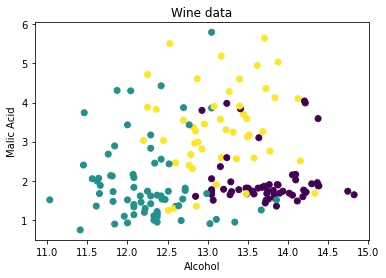

In [4]:

plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()


Split data into testing and training 80-20 split

In [5]:
#wineData, wineLabels = shuffle(wineData, wineLabels, random_state=0) #make sure the samples are not ordered
xTrn, xTst, yTrn, yTst = train_test_split(wineData, wineLabels, test_size=0.2)

In [6]:
print(xTst)

[[1.282e+01 3.370e+00 2.300e+00 1.950e+01 8.800e+01 1.480e+00 6.600e-01
  4.000e-01 9.700e-01 1.026e+01 7.200e-01 1.750e+00 6.850e+02]
 [1.350e+01 3.120e+00 2.620e+00 2.400e+01 1.230e+02 1.400e+00 1.570e+00
  2.200e-01 1.250e+00 8.600e+00 5.900e-01 1.300e+00 5.000e+02]
 [1.303e+01 9.000e-01 1.710e+00 1.600e+01 8.600e+01 1.950e+00 2.030e+00
  2.400e-01 1.460e+00 4.600e+00 1.190e+00 2.480e+00 3.920e+02]
 [1.368e+01 1.830e+00 2.360e+00 1.720e+01 1.040e+02 2.420e+00 2.690e+00
  4.200e-01 1.970e+00 3.840e+00 1.230e+00 2.870e+00 9.900e+02]
 [1.483e+01 1.640e+00 2.170e+00 1.400e+01 9.700e+01 2.800e+00 2.980e+00
  2.900e-01 1.980e+00 5.200e+00 1.080e+00 2.850e+00 1.045e+03]
 [1.103e+01 1.510e+00 2.200e+00 2.150e+01 8.500e+01 2.460e+00 2.170e+00
  5.200e-01 2.010e+00 1.900e+00 1.710e+00 2.870e+00 4.070e+02]
 [1.284e+01 2.960e+00 2.610e+00 2.400e+01 1.010e+02 2.320e+00 6.000e-01
  5.300e-01 8.100e-01 4.920e+00 8.900e-01 2.150e+00 5.900e+02]
 [1.317e+01 2.590e+00 2.370e+00 2.000e+01 1.200e+02 1.6

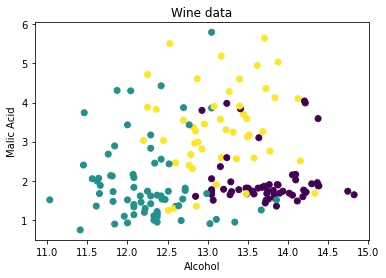

In [7]:
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# Plot showing test/train split

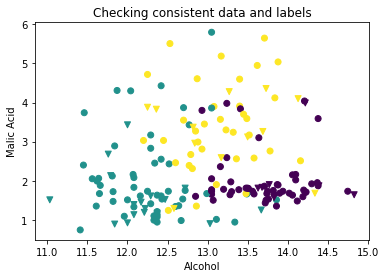

In [8]:
plt.figure()

plt.scatter(xTrn[:,0], xTrn[:,1], c=yTrn, marker="o")
plt.scatter(xTst[:,0], xTst[:,1], c=yTst, marker='v')
# Add title and axis names
plt.title('Checking consistent data and labels')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()

# Task 4.1 - Multiclass SVM for Wine Data

### Use standardScalr to standardise the class

In [9]:
normaliser = StandardScaler()
XTrn = normaliser.fit_transform(xTrn)
XTst = normaliser.transform(xTst)

In [10]:
print(XTrn)

[[ 0.48235314  1.99269536  1.83121909 ... -1.33620189 -1.00922306
  -0.40296555]
 [ 0.34139232 -0.35543201  1.15600328 ...  0.56978172  0.26970701
   1.58657696]
 [-0.54281649 -0.9179112  -1.7699319  ...  0.42683295  0.17239711
  -0.61435444]
 ...
 [-0.22245098 -0.68577693  0.55581145 ...  0.6650809   1.3679187
   0.79386862]
 [ 0.62331397 -0.50721211  1.04346731 ...  0.71273049  0.31141125
   1.04256143]
 [-0.2993387   0.26954485  0.40576349 ... -2.2415441  -1.63478669
  -0.86926457]]


In [11]:
print(XTst)

[[-2.60894842e-01  8.94521719e-01 -2.69452319e-01  2.15240479e-02
  -8.61901270e-01 -1.33044593e+00 -1.40980333e+00  3.63610068e-01
  -1.09327691e+00  2.43354540e+00 -1.09795394e+00 -1.24554710e+00
  -2.31989239e-01]
 [ 6.10499346e-01  6.71315695e-01  9.30931345e-01  1.35685090e+00
   1.84584166e+00 -1.45462525e+00 -5.18755218e-01 -1.08629217e+00
  -6.04260262e-01  1.66805530e+00 -1.71739861e+00 -1.87111072e+00
  -8.07091371e-01]
 [ 8.21218632e-03 -1.31075380e+00 -2.48265970e+00 -1.01706351e+00
  -1.01662944e+00 -6.00892389e-01 -6.83352946e-02 -9.25191921e-01
  -2.37497775e-01 -1.76499179e-01  1.14157680e+00 -2.30743890e-01
  -1.14282667e+00]
 [ 8.41162514e-01 -4.80427388e-01 -4.43803820e-02 -6.60976345e-01
   3.75924068e-01  1.28661150e-01  5.77919379e-01  5.24710317e-01
   6.53211124e-01 -5.26964530e-01  1.33217516e+00  3.11411249e-01
   7.16152115e-01]
 [ 2.31484386e+00 -6.50063966e-01 -7.57108183e-01 -1.61054211e+00
  -1.65624517e-01  7.18512948e-01  8.61879765e-01 -5.22441299e-01


In [12]:
print(xTst)
print(XTst)

[[1.282e+01 3.370e+00 2.300e+00 1.950e+01 8.800e+01 1.480e+00 6.600e-01
  4.000e-01 9.700e-01 1.026e+01 7.200e-01 1.750e+00 6.850e+02]
 [1.350e+01 3.120e+00 2.620e+00 2.400e+01 1.230e+02 1.400e+00 1.570e+00
  2.200e-01 1.250e+00 8.600e+00 5.900e-01 1.300e+00 5.000e+02]
 [1.303e+01 9.000e-01 1.710e+00 1.600e+01 8.600e+01 1.950e+00 2.030e+00
  2.400e-01 1.460e+00 4.600e+00 1.190e+00 2.480e+00 3.920e+02]
 [1.368e+01 1.830e+00 2.360e+00 1.720e+01 1.040e+02 2.420e+00 2.690e+00
  4.200e-01 1.970e+00 3.840e+00 1.230e+00 2.870e+00 9.900e+02]
 [1.483e+01 1.640e+00 2.170e+00 1.400e+01 9.700e+01 2.800e+00 2.980e+00
  2.900e-01 1.980e+00 5.200e+00 1.080e+00 2.850e+00 1.045e+03]
 [1.103e+01 1.510e+00 2.200e+00 2.150e+01 8.500e+01 2.460e+00 2.170e+00
  5.200e-01 2.010e+00 1.900e+00 1.710e+00 2.870e+00 4.070e+02]
 [1.284e+01 2.960e+00 2.610e+00 2.400e+01 1.010e+02 2.320e+00 6.000e-01
  5.300e-01 8.100e-01 4.920e+00 8.900e-01 2.150e+00 5.900e+02]
 [1.317e+01 2.590e+00 2.370e+00 2.000e+01 1.200e+02 1.6

### create and train a multiclass svm

In [13]:
svc = SVC(C = 2.0, kernel='sigmoid')
svc.fit(XTrn, yTrn)

SVC(C=2.0, kernel='sigmoid')

### Predict test data and find accuracy

In [14]:
print(XTst.shape)
print(yTst.shape)
print(XTst)
print(XTrn)

(36, 13)
(36,)
[[-2.60894842e-01  8.94521719e-01 -2.69452319e-01  2.15240479e-02
  -8.61901270e-01 -1.33044593e+00 -1.40980333e+00  3.63610068e-01
  -1.09327691e+00  2.43354540e+00 -1.09795394e+00 -1.24554710e+00
  -2.31989239e-01]
 [ 6.10499346e-01  6.71315695e-01  9.30931345e-01  1.35685090e+00
   1.84584166e+00 -1.45462525e+00 -5.18755218e-01 -1.08629217e+00
  -6.04260262e-01  1.66805530e+00 -1.71739861e+00 -1.87111072e+00
  -8.07091371e-01]
 [ 8.21218632e-03 -1.31075380e+00 -2.48265970e+00 -1.01706351e+00
  -1.01662944e+00 -6.00892389e-01 -6.83352946e-02 -9.25191921e-01
  -2.37497775e-01 -1.76499179e-01  1.14157680e+00 -2.30743890e-01
  -1.14282667e+00]
 [ 8.41162514e-01 -4.80427388e-01 -4.43803820e-02 -6.60976345e-01
   3.75924068e-01  1.28661150e-01  5.77919379e-01  5.24710317e-01
   6.53211124e-01 -5.26964530e-01  1.33217516e+00  3.11411249e-01
   7.16152115e-01]
 [ 2.31484386e+00 -6.50063966e-01 -7.57108183e-01 -1.61054211e+00
  -1.65624517e-01  7.18512948e-01  8.61879765e-01 -

In [15]:
svc.predict(XTst)
svc.score(XTst, yTst)

0.9444444444444444

### Visualise test data in scatter plot, colour the ground truth values and draw a scatter plot to visualise test data with predicted class values coloured

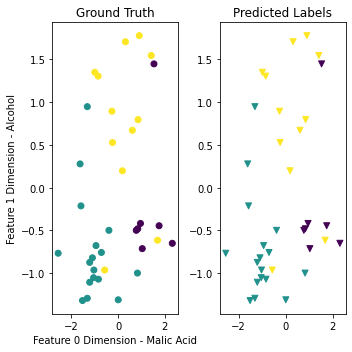

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Feature 1 Dimension - Alcohol')
axes[0].set_xlabel('Feature 0 Dimension - Malic Acid')

axes[1].set_title('Predicted Labels')

axes[0].scatter(XTst[:,0], XTst[:,1], c=yTst, marker="o")
axes[1].scatter(XTst[:,0], XTst[:,1], c=yTst, marker='v')
fig.tight_layout()




# 4.2 - Neural Network for Wine Data

In [17]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(yTrn)), activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [19]:
history = model.fit(XTrn, yTrn, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 117ms/step - loss: 1.0610 - sparse_categorical_accuracy: 0.4010 - val_loss: 1.0807 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0462 - sparse_categorical_accuracy: 0.4176 - val_loss: 1.0729 - val_sparse_categorical_accuracy: 0.3793
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0438 - sparse_categorical_accuracy: 0.3770 - val_loss: 1.0648 - val_sparse_categorical_accuracy: 0.3793
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0269 - sparse_categorical_accuracy: 0.4232 - val_loss: 1.0565 - val_sparse_categorical_accuracy: 0.3793
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0506 - sparse_categorical_accuracy: 0.3976 - val_loss: 1.0488 - val_sparse_categorical_accuracy: 0.3793
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0373 - sparse_categorical_accuracy: 0.38

4/4 [==============================] - 0s 8ms/step - loss: 0.7415 - sparse_categorical_accuracy: 0.8167 - val_loss: 0.7415 - val_sparse_categorical_accuracy: 0.7586
Epoch 48/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7180 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.7348 - val_sparse_categorical_accuracy: 0.7586
Epoch 49/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7199 - sparse_categorical_accuracy: 0.8307 - val_loss: 0.7279 - val_sparse_categorical_accuracy: 0.7586
Epoch 50/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6782 - sparse_categorical_accuracy: 0.8477 - val_loss: 0.7204 - val_sparse_categorical_accuracy: 0.7586
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7234 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.7134 - val_sparse_categorical_accuracy: 0.7586
Epoch 52/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6762 - sparse_categorical_accuracy: 0.8632 - val_

4/4 [==============================] - 0s 8ms/step - loss: 0.4440 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.4454 - val_sparse_categorical_accuracy: 0.9655
Epoch 94/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.9419 - val_loss: 0.4409 - val_sparse_categorical_accuracy: 0.9655
Epoch 95/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4530 - sparse_categorical_accuracy: 0.9423 - val_loss: 0.4364 - val_sparse_categorical_accuracy: 0.9655
Epoch 96/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4196 - sparse_categorical_accuracy: 0.9621 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.9655
Epoch 97/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4462 - sparse_categorical_accuracy: 0.9381 - val_loss: 0.4276 - val_sparse_categorical_accuracy: 0.9655
Epoch 98/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3820 - sparse_categorical_accuracy: 0.9579 - val_

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


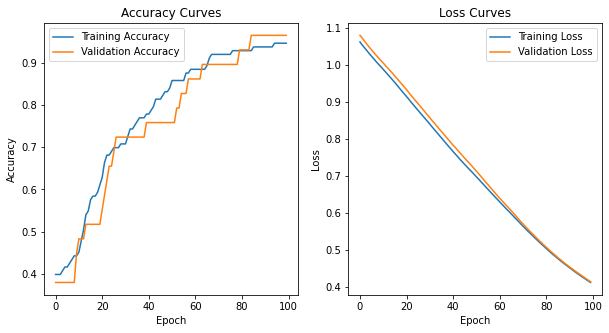

In [21]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [22]:
results = model.evaluate(XTst, yTst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 997us/step - loss: 0.5039 - sparse_categorical_accuracy: 0.8889
Test set loss: 0.50, test set accuracy: 88.89%


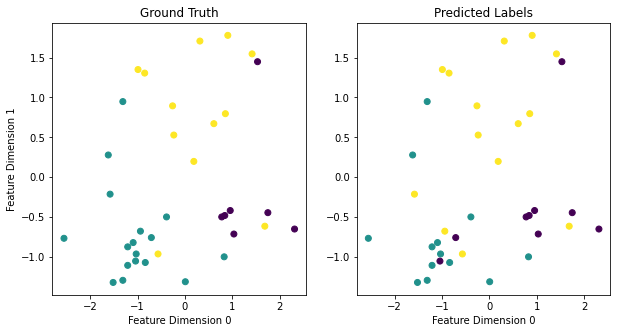

In [23]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(XTst[:,0], XTst[:,1], c=yTst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(XTst[:,0], XTst[:,1], c=np.argmax(model.predict(XTst), axis=1))
plt.show()

# 4.3 Neural Network for Digit Recognition

Load in MNIST dataset

In [24]:
(x_train, y_train), (x_test, y_test) = tf. keras.datasets.mnist.load_data()

In [25]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


### Flatten the data to pass it into a dense network

In [26]:
X_train = np.reshape(x_train, (60000, 784))
X_test = np.reshape(x_test, (10000, 784))

In [30]:
y_predicted = model.predict(X_test)

ValueError: in user code:

    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\lizks\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 13 but received input with shape (None, 784)


NameError: name 'y_predicted' is not defined

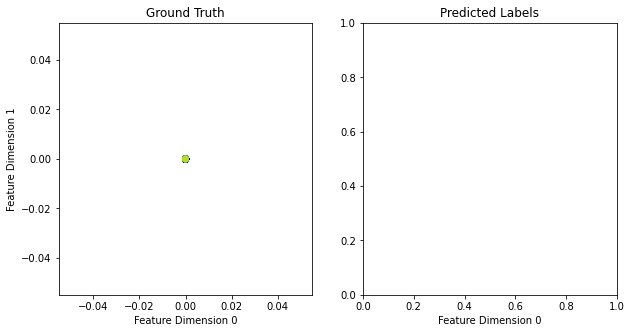

In [29]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_test[:,0], X_test[:,1], c=np.argmax(y_predicted, axis=1))
plt.show()

### Normalise data by dividing by 255 (the max val in original data)

In [85]:
NNnormaliser = StandardScaler()
X_train = NNnormaliser.fit_transform(X_train)
X_test = NNnormaliser.transform(X_test)

### Create and train a tensorflow fully connected neural network on the training set

In [86]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

In [87]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [88]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 1s 536us/step - loss: 1.8337 - sparse_categorical_accuracy: 0.3344 - val_loss: 0.8229 - val_sparse_categorical_accuracy: 0.7626
Epoch 2/100
1500/1500 [==============================] - 1s 476us/step - loss: 0.7830 - sparse_categorical_accuracy: 0.7683 - val_loss: 0.6356 - val_sparse_categorical_accuracy: 0.8194
Epoch 3/100
1500/1500 [==============================] - 1s 474us/step - loss: 0.6240 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.5636 - val_sparse_categorical_accuracy: 0.8341
Epoch 4/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.5596 - sparse_categorical_accuracy: 0.8273 - val_loss: 0.5279 - val_sparse_categorical_accuracy: 0.8392
Epoch 5/100
1500/1500 [==============================] - 1s 473us/step - loss: 0.5216 - sparse_categorical_accuracy: 0.8351 - val_loss: 0.5148 - val_sparse_categorical_accuracy: 0.8409
Epoch 6/100
1500/1500 [==============================] - 1s 471us/step - lo

1500/1500 [==============================] - 1s 477us/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8742
Epoch 90/100
1500/1500 [==============================] - 1s 471us/step - loss: 0.3774 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.4262 - val_sparse_categorical_accuracy: 0.8738
Epoch 91/100
1500/1500 [==============================] - 1s 481us/step - loss: 0.3734 - sparse_categorical_accuracy: 0.8862 - val_loss: 0.4266 - val_sparse_categorical_accuracy: 0.8742
Epoch 92/100
1500/1500 [==============================] - 1s 481us/step - loss: 0.3771 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.4257 - val_sparse_categorical_accuracy: 0.8754
Epoch 93/100
1500/1500 [==============================] - 1s 481us/step - loss: 0.3768 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4264 - val_sparse_categorical_accuracy: 0.8751
Epoch 94/100
1500/1500 [==============================] - 1s 492us/step - loss: 0.3

### Predict labels for testing set and check accurancy

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (32, 4)                   3140      
_________________________________________________________________
dense_4 (Dense)              (32, 10)                  50        
_________________________________________________________________
dense_5 (Dense)              (32, 10)                  110       
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________


In [53]:
results = model.evaluate(X_test, y_test)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 0s 556us/step - loss: 0.4292 - sparse_categorical_accuracy: 0.8740
Test set loss: 0.43, test set accuracy: 87.40%


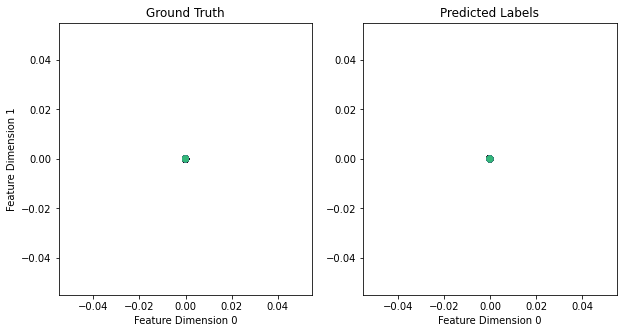

In [55]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_test[:,0], X_test[:,1], c=np.argmax(model.predict(X_test), axis=1))
plt.show()

### Plot models training curves

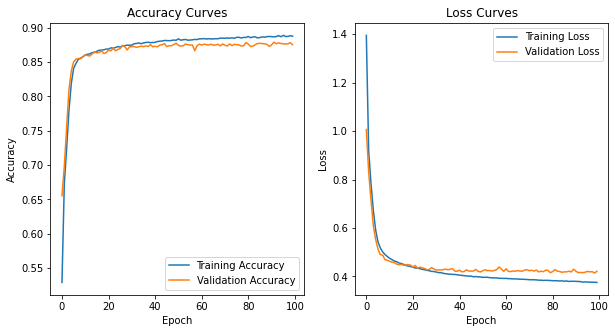

In [56]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Change hyper parameters

# 4.4 Convolutional Neural Network for Digit Recognition

### Load original MNIST dataset
(x_train, y_train), (x_test, y_test)

### Expland the data to include a channel dimension for CNN. As images are greyscale add one additional axis in the last dimension of our data

In [74]:
print(x_train.shape)

(60000, 28, 28)


In [75]:
cnn_train_x = np.expand_dims(x_train, axis=(3))

In [76]:
print(cnn_train_x.shape)

(60000, 28, 28, 1)


### Normalise the data

In [90]:
CNNnormaliser = StandardScaler()
cnn_train_x = CNNnormaliser.fit_transform(cnn_train_x)
cnn_test_x = CNNnormaliser.transform(cnn_train_x)

ValueError: Found array with dim 4. StandardScaler expected <= 2.

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

###  Predict labels for the testing set and check accuracy

### Plot models traing curves 

# Task 4.5

# What makes a neural network a "Deep Learning" Model 

The number of layers of neurons, increasing the number of hidden layers makes the model do more logistic regression functions - as each neuron performas a logisitic regression anaylsis on a different set of parameters, if you complete more hidden layers, more combinations of parameters have been checked for optimality.

# How do I make my neural network deeper? How do I make it wider?

To add depth, add more hidden layers. To add width add more neurons to each layer. Although it is a good idea to have a similar number of neurons in each layer as the number of neurons inputted at the start of the model.

# How do I train my models for longer 

By adding layers and adding neurons.

# Why does running the methods numerous times result in different accuracy values 

Each neuron can be given random starting parameters so there is a stochastic nature to NN.

# What hyperparameters are availbale to our models? What happens when we alter the penalty in the SVM or the optimisation strategy in the neural network? 

We can use different kernels, different degrees, change the number of iterations, gamma (kernel coefficients), probability